In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline

In [34]:
fileList = glob('../../downloads/QS_data/qs_l2b_v4p1/*_v4.1_20000101*.nc')
checkFile = '../../downloads/Buoy/extractedGZ/WINDS/T_00N_095W_withRAIN_COARE3p5_2000.nc'
dsRef = xr.open_dataset(checkFile)

In [35]:
len(fileList)

8

In [36]:
dsRef

<xarray.Dataset>
Dimensions:         (time: 306026)
Coordinates:
  * time            (time) datetime64[ns] 2000-01-01 ... 2007-04-21T06:00:00
Data variables:
    U10N            (time) float64 ...
    U10             (time) float64 ...
    U10_direction   (time) float64 ...
    U10N2           (time) float64 ...
    U102            (time) float64 ...
    U10_direction2  (time) float64 ...
    U10N2_x         (time) float64 ...
    U10N2_y         (time) float64 ...
    SST             (time) float64 ...
    RH              (time) float64 ...
    RAIN            (time) float64 ...
    AIRT            (time) float64 ...

In [42]:
test = True
c = 0

ds = xr.open_dataset(fileList[c])
ds['time'][0].to_numpy(), ds['time'][-1].to_numpy()
ds['lon'].to_numpy

refTime = dsRef.time[25].to_numpy()
refLat = 0
refLon = (-95 + 360)%360

print(refTime)

while True:
    ds = xr.open_dataset(fileList[c])
    time0 = ds['time'][0].to_numpy() 
    time1 = ds['time'][-1].to_numpy()
    print(time0, time1)
    if refTime < time1 and refTime > time0:
        print('time available')            
        lon = ds['lon'].to_numpy()
        if (np.min(lon)+360)%360 < refLon and (np.max(lon)+360)%360 > refLon:
            print('lon available')  
            lat = ds['lat'].to_numpy()
            if np.min(lat) < refLat and np.max(lat) > refLat:
                print('available')
                break
    c += 1
            


2000-01-01T04:09:59.999999744
2000-01-01T07:42:03.376616020 2000-01-01T09:23:06.279041308
2000-01-01T04:19:57.563612016 2000-01-01T06:01:00.440037308
2000-01-01T09:23:06.279632652 2000-01-01T11:04:09.290057932
2000-01-01T06:01:00.440621100 2000-01-01T07:42:03.376046384
2000-01-01T00:57:51.557642504 2000-01-01T02:38:54.632067780
2000-01-01T12:45:12.324642040 2000-01-01T14:26:15.396067316
2000-01-01T11:04:09.290636192 2000-01-01T12:45:12.324061468
2000-01-01T02:38:54.632620332 2000-01-01T04:19:57.563045616
time available
lon available
available


In [43]:
ds

<xarray.Dataset>
Dimensions:                           (along_track: 3248, cross_track: 152,
                                       ambiguities: 4)
Coordinates:
    lat                               (along_track, cross_track) float32 -89....
    lon                               (along_track, cross_track) float32 112....
    num_ambiguities                   (along_track, cross_track) float32 ...
Dimensions without coordinates: along_track, cross_track, ambiguities
Data variables: (12/22)
    time                              (along_track) datetime64[ns] ...
    retrieved_wind_speed              (along_track, cross_track) float32 ...
    retrieved_wind_direction          (along_track, cross_track) float32 ...
    rain_impact                       (along_track, cross_track) float32 ...
    flags                             (along_track, cross_track) float32 ...
    eflags                            (along_track, cross_track) float32 ...
    ...                                ...
    number_in_aft                     (along_track, cross_track) float32 ...
    number_out_fore                   (along_track, cross_track) float32 ...
    number_out_aft                    (along_track, cross_track) float32 ...
    gmf_sst                           (along_track, cross_track) float32 ...
    distance_from_coast               (along_track, cross_track) float32 ...
    exp_bias_wrt_oceanward_neighbors  (along_track, cross_track) float32 ...
Attributes: (12/51)
    history:                     2017-353T12:58:26+0000 fore /home/fore/sds/v...
    processing_level:            L2B
    date_created:                2017-353T12:58:26
    cross_track_resolution:      12.5
    along_track_resolution:      12.5
    zero_index:                  76
    ...                          ...
    references:                  10.1109/TGRS.2012.2235843; 10.1109/TGRS.2014...
    InstrumentShortName:         SeaWinds
    ancillary_data_descriptors:  QS_PC2B0006.CP12\nQS_MC2B0001\nSNWP120000010...
    data_format_type:            netCDF-4
    version_id:                  V4.1
    GranulePointer:              qs_l2b_02786_v4.1_200001010238.nc

In [59]:
lat = ds['lat'].to_numpy()
lon = ds['lon'].to_numpy()
wspd = ds['retrieved_wind_speed'].to_numpy()
wdir = ds['retrieved_wind_direction'].to_numpy()
mask = np.logical_and(lat > -5, lat < 5)

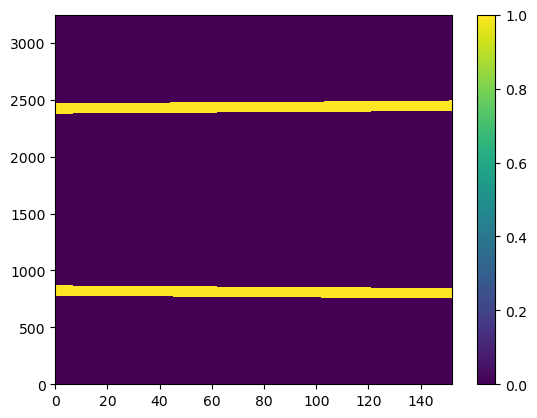

In [60]:
plt.pcolormesh(mask)
plt.colorbar()

ValueError: not enough values to unpack (expected 2, got 1)

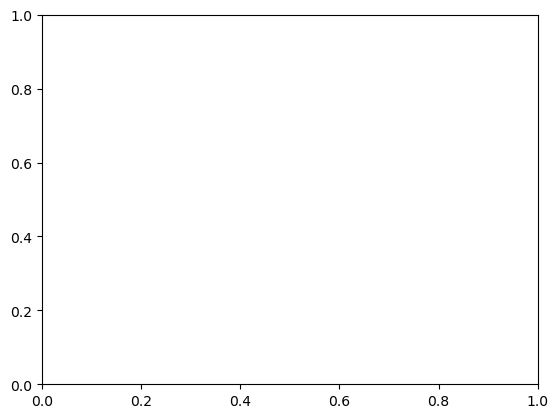

In [61]:
plt.pcolormesh(lon[mask], lat[mask], wspd[mask])
plt.colorbar()

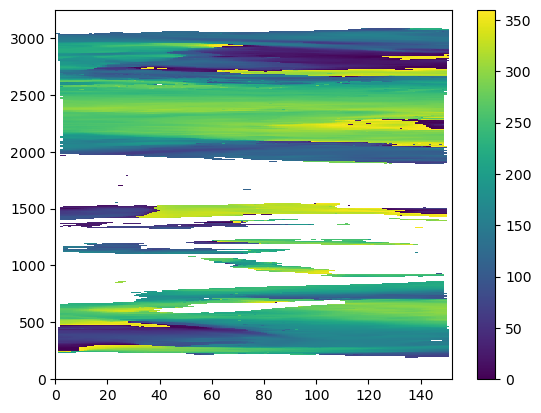

In [53]:
plt.pcolormesh(wdir)
plt.colorbar()